In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [92]:
df_house = pd.read_csv('kc_house_data.csv')
df_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [93]:
df_house.shape

(21597, 21)

In [94]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [95]:
df_house.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [96]:
df_house.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [97]:
# Data visualization

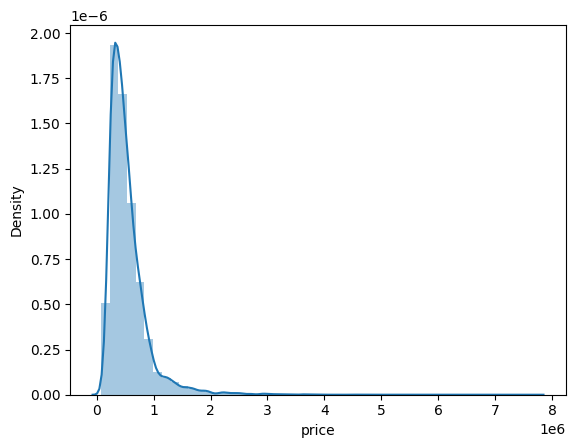

In [98]:
sns.distplot(df_house['price'])
plt.show()

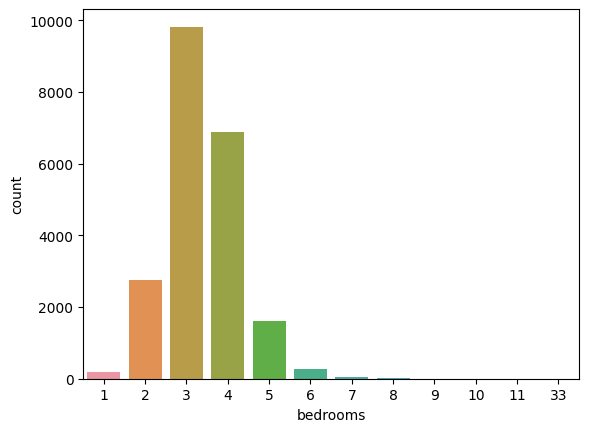

In [99]:
sns.countplot(x=df_house['bedrooms']);

In [100]:
df_house.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

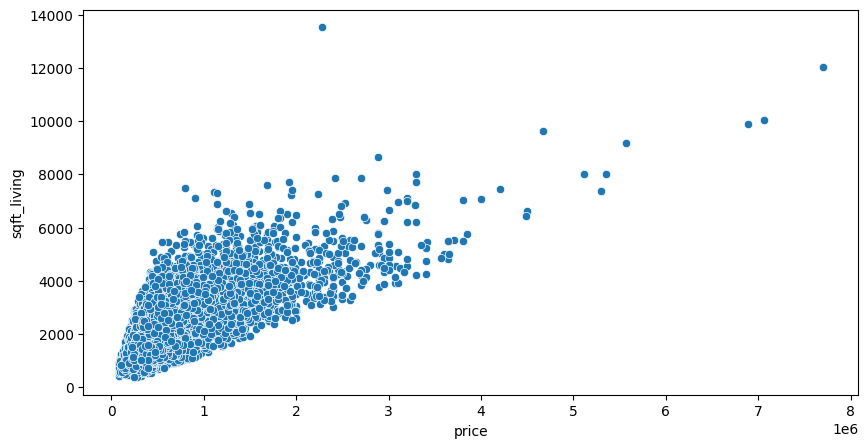

In [101]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_house,x='price',y='sqft_living');

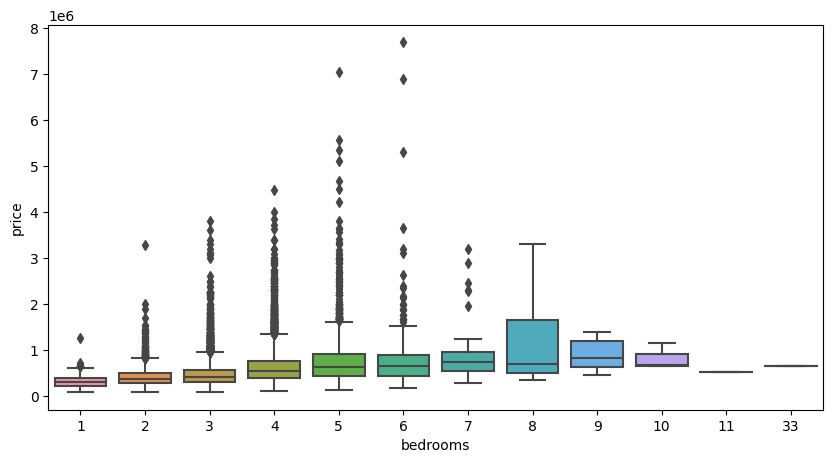

In [102]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_house,x='bedrooms',y='price');

In [103]:
df_house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

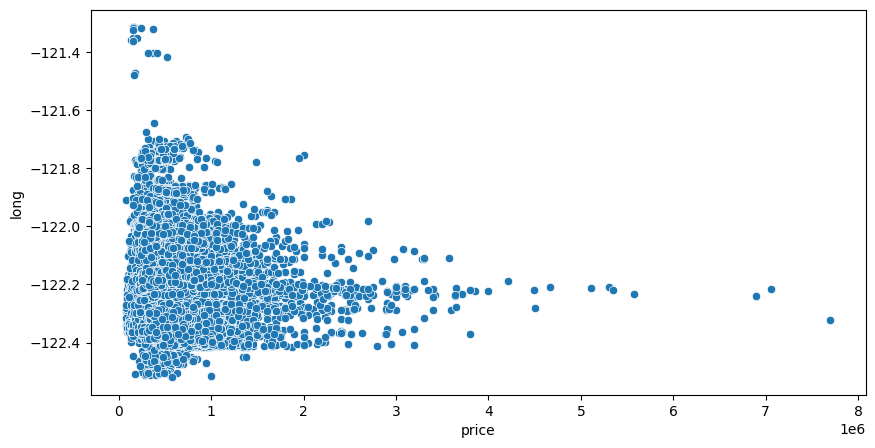

In [104]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_house,x='price',y='long');

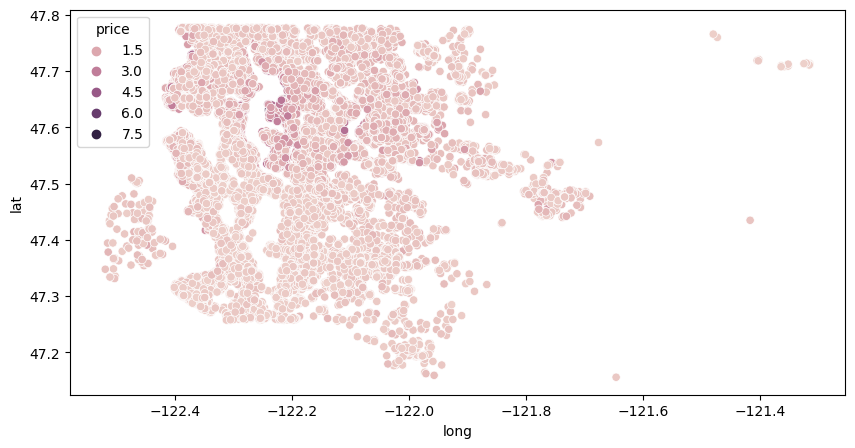

In [105]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_house,x='long',y='lat',hue='price');

In [106]:
df_house.sort_values(by='price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [107]:
len(df_house)*0.01

215.97

In [108]:
non_top_1_per = df_house.sort_values('price',ascending=False).iloc[216:]
non_top_1_per.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,...,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4055701200,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,...,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868


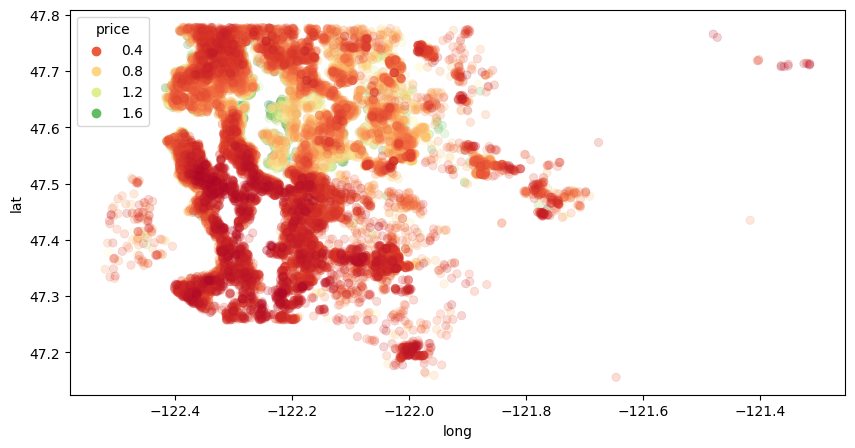

In [109]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=non_top_1_per,x='long',y='lat',hue='price',edgecolor=None,alpha=0.2,palette='RdYlGn');

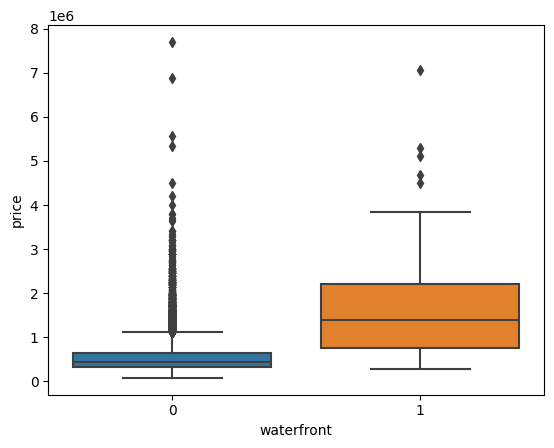

In [110]:
sns.boxplot(data=df_house,x='waterfront',y='price');

In [111]:
df_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [112]:
df_house.drop(['id'],axis=1,inplace=True)

In [113]:
df_house['date'] = pd.to_datetime(df_house['date'])

In [114]:
df_house['date'][0:5]

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [115]:
df_house['year'] = df_house['date'].apply(lambda date : date.year)
df_house['month'] = df_house['date'].apply(lambda date : date.month)

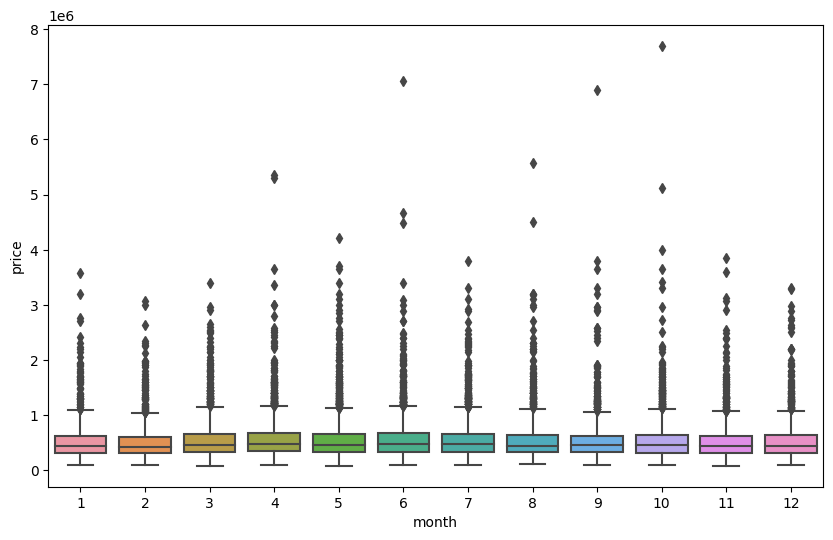

In [116]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_house,x='month',y='price');

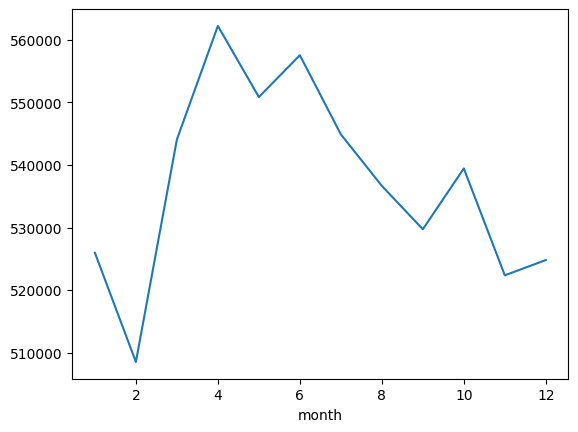

In [117]:
df_house.groupby('month').mean()['price'].plot();

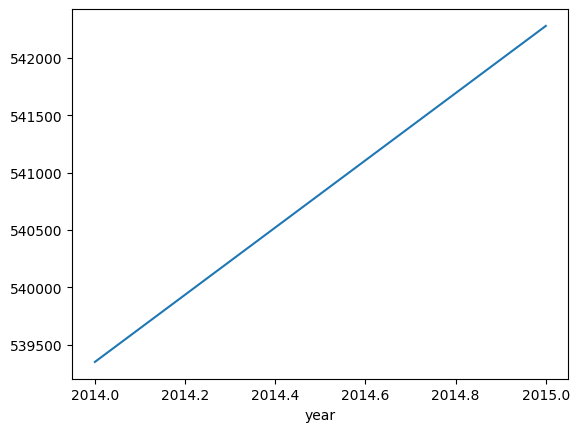

In [118]:
df_house.groupby('year').mean()['price'].plot();

In [119]:
df_house = df_house.drop('date',axis=1)
df_house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [120]:
df_house['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [121]:
df_house = df_house.drop('zipcode',axis=1)
df_house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


In [122]:
df_house['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [123]:
df_house['sqft_basement'].value_counts()

0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

In [124]:
X = df_house.drop('price',axis=1)
y = df_house['price']

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [127]:
from sklearn.preprocessing import MinMaxScaler

In [128]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [129]:
import tensorflow 
tensorflow.__version__

'2.12.0'

In [130]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [131]:
model = Sequential()
model

In [132]:
X_train.shape

(15117, 19)

In [133]:
model = Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [134]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 2s 7ms/step - loss: 430243512320.0000 - val_loss: 418939568128.0000
Epoch 2/400
119/119 [==============================] - 0s 3ms/step - loss: 429566033920.0000 - val_loss: 416626278400.0000
Epoch 3/400
119/119 [==============================] - 0s 3ms/step - loss: 420095000576.0000 - val_loss: 394693541888.0000
Epoch 4/400
119/119 [==============================] - 0s 3ms/step - loss: 369190862848.0000 - val_loss: 306197495808.0000
Epoch 5/400
119/119 [==============================] - 0s 3ms/step - loss: 239657320448.0000 - val_loss: 155139375104.0000
Epoch 6/400
119/119 [==============================] - 0s 3ms/step - loss: 120685920256.0000 - val_loss: 97040203776.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 98565840896.0000 - val_loss: 94492647424.0000
Epoch 8/400
119/119 [==============================] - 0s 3ms/step - loss: 96814243840.0000 - val_loss: 93024083968.0000
Epoch 9/400
119/119 [

119/119 [==============================] - 0s 2ms/step - loss: 38767407104.0000 - val_loss: 37470154752.0000
Epoch 69/400
119/119 [==============================] - 0s 2ms/step - loss: 38550118400.0000 - val_loss: 37296635904.0000
Epoch 70/400
119/119 [==============================] - 0s 2ms/step - loss: 38394798080.0000 - val_loss: 37079199744.0000
Epoch 71/400
119/119 [==============================] - 0s 2ms/step - loss: 38213947392.0000 - val_loss: 36896669696.0000
Epoch 72/400
119/119 [==============================] - 0s 2ms/step - loss: 38007767040.0000 - val_loss: 36728078336.0000
Epoch 73/400
119/119 [==============================] - 0s 2ms/step - loss: 37826834432.0000 - val_loss: 36638720000.0000
Epoch 74/400
119/119 [==============================] - 0s 2ms/step - loss: 37692612608.0000 - val_loss: 36408778752.0000
Epoch 75/400
119/119 [==============================] - 0s 2ms/step - loss: 37544394752.0000 - val_loss: 36252950528.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 0s 2ms/step - loss: 33102278656.0000 - val_loss: 31779176448.0000
Epoch 136/400
119/119 [==============================] - 0s 3ms/step - loss: 33116176384.0000 - val_loss: 31725174784.0000
Epoch 137/400
119/119 [==============================] - 0s 2ms/step - loss: 33085151232.0000 - val_loss: 31714914304.0000
Epoch 138/400
119/119 [==============================] - 0s 3ms/step - loss: 33094281216.0000 - val_loss: 31645396992.0000
Epoch 139/400
119/119 [==============================] - 0s 3ms/step - loss: 33010219008.0000 - val_loss: 31588157440.0000
Epoch 140/400
119/119 [==============================] - 0s 3ms/step - loss: 32968030208.0000 - val_loss: 31545794560.0000
Epoch 141/400
119/119 [==============================] - 0s 3ms/step - loss: 32930660352.0000 - val_loss: 31493761024.0000
Epoch 142/400
119/119 [==============================] - 0s 3ms/step - loss: 32914411520.0000 - val_loss: 31472775168.0000
Epoch 143/400
11

119/119 [==============================] - 0s 2ms/step - loss: 31603236864.0000 - val_loss: 29802565632.0000
Epoch 202/400
119/119 [==============================] - 0s 2ms/step - loss: 31606978560.0000 - val_loss: 29774413824.0000
Epoch 203/400
119/119 [==============================] - 0s 2ms/step - loss: 31600373760.0000 - val_loss: 29780506624.0000
Epoch 204/400
119/119 [==============================] - 0s 2ms/step - loss: 31577966592.0000 - val_loss: 29739788288.0000
Epoch 205/400
119/119 [==============================] - 0s 2ms/step - loss: 31521712128.0000 - val_loss: 29704654848.0000
Epoch 206/400
119/119 [==============================] - 0s 2ms/step - loss: 31568945152.0000 - val_loss: 29693106176.0000
Epoch 207/400
119/119 [==============================] - 0s 2ms/step - loss: 31499194368.0000 - val_loss: 29793933312.0000
Epoch 208/400
119/119 [==============================] - 0s 3ms/step - loss: 31481886720.0000 - val_loss: 29706782720.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 30728286208.0000 - val_loss: 28773898240.0000
Epoch 268/400
119/119 [==============================] - 0s 2ms/step - loss: 30737598464.0000 - val_loss: 28746964992.0000
Epoch 269/400
119/119 [==============================] - 0s 2ms/step - loss: 30746613760.0000 - val_loss: 28761544704.0000
Epoch 270/400
119/119 [==============================] - 0s 2ms/step - loss: 30729455616.0000 - val_loss: 28728588288.0000
Epoch 271/400
119/119 [==============================] - 0s 3ms/step - loss: 30751909888.0000 - val_loss: 28751935488.0000
Epoch 272/400
119/119 [==============================] - 0s 3ms/step - loss: 30723708928.0000 - val_loss: 28757352448.0000
Epoch 273/400
119/119 [==============================] - 0s 3ms/step - loss: 30672334848.0000 - val_loss: 28712839168.0000
Epoch 274/400
119/119 [==============================] - 0s 2ms/step - loss: 30703429632.0000 - val_loss: 28689969152.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 30183608320.0000 - val_loss: 27988391936.0000
Epoch 334/400
119/119 [==============================] - 0s 2ms/step - loss: 30120923136.0000 - val_loss: 28015835136.0000
Epoch 335/400
119/119 [==============================] - 0s 2ms/step - loss: 30181040128.0000 - val_loss: 27951163392.0000
Epoch 336/400
119/119 [==============================] - 0s 2ms/step - loss: 30089463808.0000 - val_loss: 27955742720.0000
Epoch 337/400
119/119 [==============================] - 0s 2ms/step - loss: 30120546304.0000 - val_loss: 27965734912.0000
Epoch 338/400
119/119 [==============================] - 0s 3ms/step - loss: 30127675392.0000 - val_loss: 27985690624.0000
Epoch 339/400
119/119 [==============================] - 0s 2ms/step - loss: 30074484736.0000 - val_loss: 27937943552.0000
Epoch 340/400
119/119 [==============================] - 0s 2ms/step - loss: 30042669056.0000 - val_loss: 27921412096.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 29600645120.0000 - val_loss: 27283955712.0000
Epoch 400/400
119/119 [==============================] - 0s 1ms/step - loss: 29540683776.0000 - val_loss: 27246622720.0000


In [135]:
losses = pd.DataFrame(model.history.history)

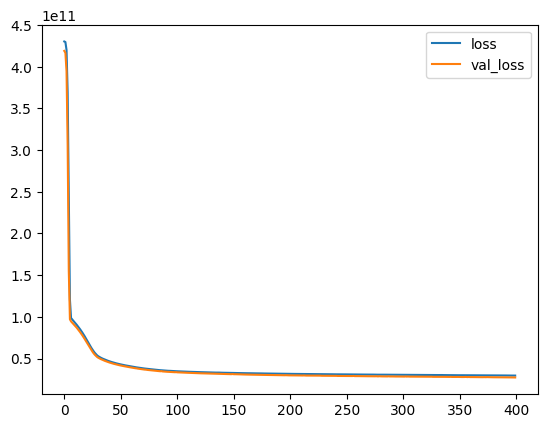

In [136]:
losses.plot();

In [137]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [138]:
predictions = model.predict(X_test)
predictions

203/203 [==============================] - 0s 500us/step


array([[391369.03],
       [594474.9 ],
       [552891.9 ],
       ...,
       [375329.28],
       [551945.2 ],
       [677734.75]], dtype=float32)

In [139]:
mean_squared_error(y_test,predictions)

27246621313.314533

In [140]:
mean_absolute_error(y_test,predictions)

101763.14174744405

In [141]:
mean_squared_error(y_test,predictions,squared=False)

165065.5061280658

In [142]:
df_house['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [143]:
explained_variance_score(y_test,predictions)

0.7945471964270505

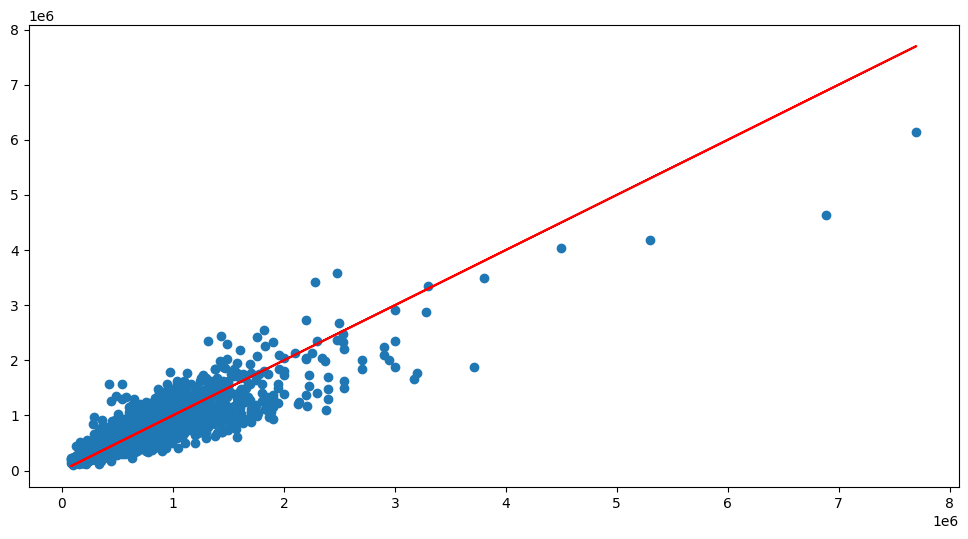

In [144]:
plt.figure(figsize=(12,6))
plt.scatter(x=y_test,y=predictions)
plt.plot(y_test,y_test,'r');

In [145]:
single_house = df_house.drop('price',axis=1).iloc[0]

In [146]:
single_house.values.reshape(-1,19)

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  2.01400e+03,  1.00000e+01]])

In [147]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [148]:
model.predict(single_house)

1/1 [==============================] - 0s 12ms/step


array([[285626.84]], dtype=float32)

In [149]:
df_house.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10


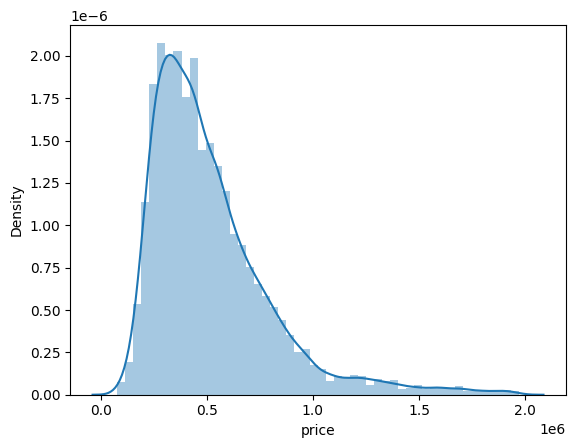

In [150]:
sns.distplot(non_top_1_per['price']);

In [151]:
non_top_1_per['date'] = pd.to_datetime(non_top_1_per['date'])

In [152]:
non_top_1_per['year'] = non_top_1_per['date'].apply(lambda date : date.year)
non_top_1_per['month'] = non_top_1_per['date'].apply(lambda date : date.month)
non_top_1_per.drop('date',axis=1,inplace=True)

In [153]:
X =  non_top_1_per.drop('price',axis=1)
y = non_top_1_per['price']

In [154]:
non_top_1_per.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
6329,824059321,1970000.0,4,3.50,4370,8510,2.0,0,1,3,...,760,2003,0,98004,47.5876,-122.204,2960,10347,2014,6
12271,1923000260,1960000.0,5,4.50,6200,23373,3.0,0,1,4,...,1150,1988,0,98040,47.5632,-122.215,3700,14486,2014,10
9166,3124059023,1960000.0,3,1.75,3330,12566,1.0,1,4,4,...,1390,1960,0,98040,47.5287,-122.220,3730,16560,2015,2
12565,2806300065,1960000.0,4,4.00,4430,31353,2.0,0,0,3,...,0,1998,0,98005,47.6422,-122.157,3900,35237,2015,4
1150,4055701200,1960000.0,4,2.75,3120,7898,1.0,1,4,4,...,1560,1963,0,98034,47.7165,-122.259,2630,13868,2015,4


In [155]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [156]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [157]:
model2 = Sequential()
model2.add(Dense(19,activation='relu'))
model2.add(Dense(19,activation='relu'))
model2.add(Dense(19,activation='relu'))
model2.add(Dense(19,activation='relu'))
model2.add(Dense(1))
model2.compile(optimizer='adam',loss='mse')

In [158]:
model2.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=128,epochs=400)

Epoch 1/400
117/117 [==============================] - 1s 2ms/step - loss: 346837188608.0000 - val_loss: 356645076992.0000
Epoch 2/400
117/117 [==============================] - 0s 1ms/step - loss: 343263117312.0000 - val_loss: 344356061184.0000
Epoch 3/400
117/117 [==============================] - 0s 1ms/step - loss: 299912953856.0000 - val_loss: 250114228224.0000
Epoch 4/400
117/117 [==============================] - 0s 1ms/step - loss: 154984497152.0000 - val_loss: 81634320384.0000
Epoch 5/400
117/117 [==============================] - 0s 1ms/step - loss: 61651980288.0000 - val_loss: 58553827328.0000
Epoch 6/400
117/117 [==============================] - 0s 1ms/step - loss: 56752812032.0000 - val_loss: 57332068352.0000
Epoch 7/400
117/117 [==============================] - 0s 1ms/step - loss: 55593402368.0000 - val_loss: 56078581760.0000
Epoch 8/400
117/117 [==============================] - 0s 1ms/step - loss: 54394232832.0000 - val_loss: 54811275264.0000
Epoch 9/400
117/117 [====

117/117 [==============================] - 0s 1ms/step - loss: 23452651520.0000 - val_loss: 23901724672.0000
Epoch 69/400
117/117 [==============================] - 0s 992us/step - loss: 23430606848.0000 - val_loss: 23893987328.0000
Epoch 70/400
117/117 [==============================] - 0s 1ms/step - loss: 23394519040.0000 - val_loss: 23861299200.0000
Epoch 71/400
117/117 [==============================] - 0s 1ms/step - loss: 23361304576.0000 - val_loss: 23823454208.0000
Epoch 72/400
117/117 [==============================] - 0s 1ms/step - loss: 23328751616.0000 - val_loss: 23791687680.0000
Epoch 73/400
117/117 [==============================] - 0s 1ms/step - loss: 23296602112.0000 - val_loss: 23780317184.0000
Epoch 74/400
117/117 [==============================] - 0s 1ms/step - loss: 23263270912.0000 - val_loss: 23738570752.0000
Epoch 75/400
117/117 [==============================] - 0s 1ms/step - loss: 23232294912.0000 - val_loss: 23770267648.0000
Epoch 76/400
117/117 [=============

Epoch 135/400
117/117 [==============================] - 0s 1ms/step - loss: 21040508928.0000 - val_loss: 21989849088.0000
Epoch 136/400
117/117 [==============================] - 0s 1ms/step - loss: 21039669248.0000 - val_loss: 21959751680.0000
Epoch 137/400
117/117 [==============================] - 0s 1ms/step - loss: 21038467072.0000 - val_loss: 22010564608.0000
Epoch 138/400
117/117 [==============================] - 0s 1ms/step - loss: 21038401536.0000 - val_loss: 21932167168.0000
Epoch 139/400
117/117 [==============================] - 0s 1ms/step - loss: 21016221696.0000 - val_loss: 21918976000.0000
Epoch 140/400
117/117 [==============================] - 0s 1ms/step - loss: 21000108032.0000 - val_loss: 21919379456.0000
Epoch 141/400
117/117 [==============================] - 0s 1ms/step - loss: 20986359808.0000 - val_loss: 21934073856.0000
Epoch 142/400
117/117 [==============================] - 0s 1ms/step - loss: 20973121536.0000 - val_loss: 21915482112.0000
Epoch 143/400
11

117/117 [==============================] - 0s 992us/step - loss: 20713041920.0000 - val_loss: 21610108928.0000
Epoch 202/400
117/117 [==============================] - 0s 1ms/step - loss: 20679927808.0000 - val_loss: 21604624384.0000
Epoch 203/400
117/117 [==============================] - 0s 1ms/step - loss: 20697546752.0000 - val_loss: 21645385728.0000
Epoch 204/400
117/117 [==============================] - 0s 1ms/step - loss: 20700078080.0000 - val_loss: 21603940352.0000
Epoch 205/400
117/117 [==============================] - 0s 1ms/step - loss: 20725975040.0000 - val_loss: 21593546752.0000
Epoch 206/400
117/117 [==============================] - 0s 1ms/step - loss: 20668422144.0000 - val_loss: 21584822272.0000
Epoch 207/400
117/117 [==============================] - 0s 1ms/step - loss: 20660633600.0000 - val_loss: 21584384000.0000
Epoch 208/400
117/117 [==============================] - 0s 1ms/step - loss: 20671746048.0000 - val_loss: 21587501056.0000
Epoch 209/400
117/117 [=====

117/117 [==============================] - 0s 1ms/step - loss: 20493461504.0000 - val_loss: 21434892288.0000
Epoch 268/400
117/117 [==============================] - 0s 1ms/step - loss: 20497772544.0000 - val_loss: 21337956352.0000
Epoch 269/400
117/117 [==============================] - 0s 1ms/step - loss: 20474189824.0000 - val_loss: 21477380096.0000
Epoch 270/400
117/117 [==============================] - 0s 1ms/step - loss: 20464967680.0000 - val_loss: 21348327424.0000
Epoch 271/400
117/117 [==============================] - 0s 1ms/step - loss: 20456382464.0000 - val_loss: 21324929024.0000
Epoch 272/400
117/117 [==============================] - 0s 992us/step - loss: 20472057856.0000 - val_loss: 21322854400.0000
Epoch 273/400
117/117 [==============================] - 0s 1ms/step - loss: 20463284224.0000 - val_loss: 21329328128.0000
Epoch 274/400
117/117 [==============================] - 0s 1ms/step - loss: 20437821440.0000 - val_loss: 21309378560.0000
Epoch 275/400
117/117 [=====

117/117 [==============================] - 0s 1ms/step - loss: 20207038464.0000 - val_loss: 21078089728.0000
Epoch 334/400
117/117 [==============================] - 0s 1ms/step - loss: 20250550272.0000 - val_loss: 21116561408.0000
Epoch 335/400
117/117 [==============================] - 0s 1ms/step - loss: 20265050112.0000 - val_loss: 21054468096.0000
Epoch 336/400
117/117 [==============================] - 0s 1ms/step - loss: 20210782208.0000 - val_loss: 21026400256.0000
Epoch 337/400
117/117 [==============================] - 0s 1ms/step - loss: 20227526656.0000 - val_loss: 21057443840.0000
Epoch 338/400
117/117 [==============================] - 0s 1ms/step - loss: 20213995520.0000 - val_loss: 21017331712.0000
Epoch 339/400
117/117 [==============================] - 0s 1ms/step - loss: 20216283136.0000 - val_loss: 21018869760.0000
Epoch 340/400
117/117 [==============================] - 0s 1ms/step - loss: 20198074368.0000 - val_loss: 21018890240.0000
Epoch 341/400
117/117 [=======

117/117 [==============================] - 0s 1ms/step - loss: 19893393408.0000 - val_loss: 20641417216.0000
Epoch 400/400
117/117 [==============================] - 0s 1ms/step - loss: 19895023616.0000 - val_loss: 20653850624.0000


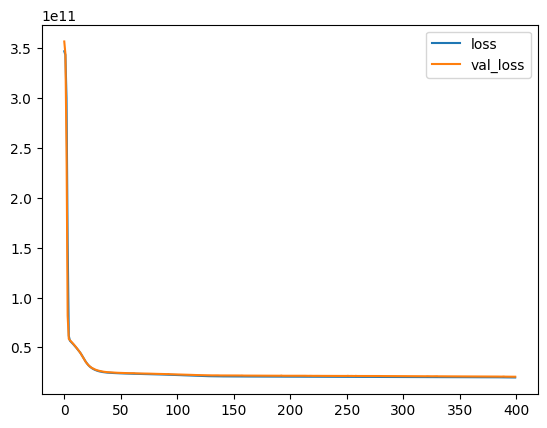

In [159]:
losses = pd.DataFrame(data=model2.history.history)
losses.plot();

In [160]:
predictions2 = model2.predict(X_test)
predictions2

201/201 [==============================] - 0s 520us/step


array([[873785.1 ],
       [569043.56],
       [448006.84],
       ...,
       [516269.16],
       [467899.38],
       [575597.9 ]], dtype=float32)

In [161]:
mean_squared_error(y_test,predictions2)

20653851048.375584

In [162]:
mean_absolute_error(y_test,predictions2)

97098.95960395558

In [163]:
mean_squared_error(y_test,predictions2,squared=False)

143714.47751836132